In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.patches as patches
from utils import map_samples
from scipy import stats
import config as config
from utils import calculate_reduction_rate_cetrophylum
import config

In [6]:
metals = metals = pd.read_csv(config.METALS_DIFF_DISTILLED_FILEPATH)
metals = metals.drop('Unnamed: 0', axis=1)
metals

,HeavyMetal,RawSewage,1:1_Dilution,1:1_Control,1:3_Dilution,1:3_Control,1:7_Dilution,1:7_Control
0,Mn,57.516373,31.431752,11.162130,94.774767,11.652405,55.161256,20.443297
1,Cu,25.790387,35.265691,16.120950,45.773120,14.433062,59.863786,26.879431
2,Co,52.259205,8.309450,4.105632,17.415088,6.112192,42.203933,2.804948
3,Cr,3.766430,30.298268,5.600659,28.975732,7.461516,56.553794,1.437763
4,Cd,49.261686,10.786106,6.273545,18.320772,6.468044,29.800379,6.439978
5,Zn,27.768717,38.453051,9.985962,32.593281,10.726494,43.065866,5.682199


In [7]:
physical = pd.read_csv(config.PHYSIO_DIFFRENCE_FILEPATH)
physical = physical.drop('Unnamed: 0', axis=1)
physical

,Parameters,RawSewage,1:1_Dilution,1:1_Control,1:3_Dilution,1:3_Control,1:7_Dilution,1:7_Control
0,pH,-9.950558,-23.659206,-8.924300,-19.777442,-3.700960,-22.245491,-5.006308
1,Conductivity,3.223147,4.675720,-3.810333,15.950264,-8.957236,23.216482,-4.543134
2,TDS,-3.788292,7.753923,-1.183013,16.950592,-6.183122,24.711987,-10.590689
3,Salinity,5.199776,12.709072,-4.511706,21.201503,-0.551395,26.063582,-37.958756
4,DO,-228.145910,-90.584381,18.439389,-55.621661,18.571719,-36.584631,25.896663
5,Nitrate nitrogen,9.768687,27.644259,6.085829,49.401526,8.300678,83.087831,19.402985
6,Ammonical nitrogen,7.817668,83.954878,-4.835876,85.482982,-114.054785,98.478056,-17.898034
7,Total phosphorus,40.262208,60.465380,5.979610,70.520426,33.494080,51.927139,-2.310315
8,Ortho phosphorus,26.013430,84.716626,-13.246691,89.204332,-11.064807,71.477684,-15.386644
9,Total Hardness,5.306342,18.875651,-0.207214,25.847775,5.987967,31.104749,9.684538


HeavyMetal                Mn        Cu        Co        Cr        Cd        Zn
Parameters                                                                    
pH                 -0.587246 -0.820645 -0.296248 -0.863398 -0.228771 -0.927887
Conductivity        0.787289  0.964967  0.581855  0.887624  0.477881  0.865448
TDS                 0.660464    0.9034  0.387134  0.950614   0.25722  0.853749
Salinity            0.619821  0.625325  0.507312  0.764115  0.425904  0.855613
DO                 -0.499935 -0.159549  -0.76586 -0.030724 -0.867057 -0.527732
Nitrate nitrogen    0.588857   0.97042   0.40176  0.937261  0.245497  0.739063
Ammonical nitrogen  0.663513  0.847005  0.365034  0.758693   0.32219  0.835603
Total phosphorus    0.737424  0.634304  0.396225  0.679605  0.370638  0.863444
Ortho phosphorus    0.752239  0.811703  0.357084  0.797756  0.320085  0.934073
Total Hardness      0.669794  0.960001   0.30045  0.916374  0.183404  0.804188
Calcium Hardness    0.734355  0.879587  0.429145  0.

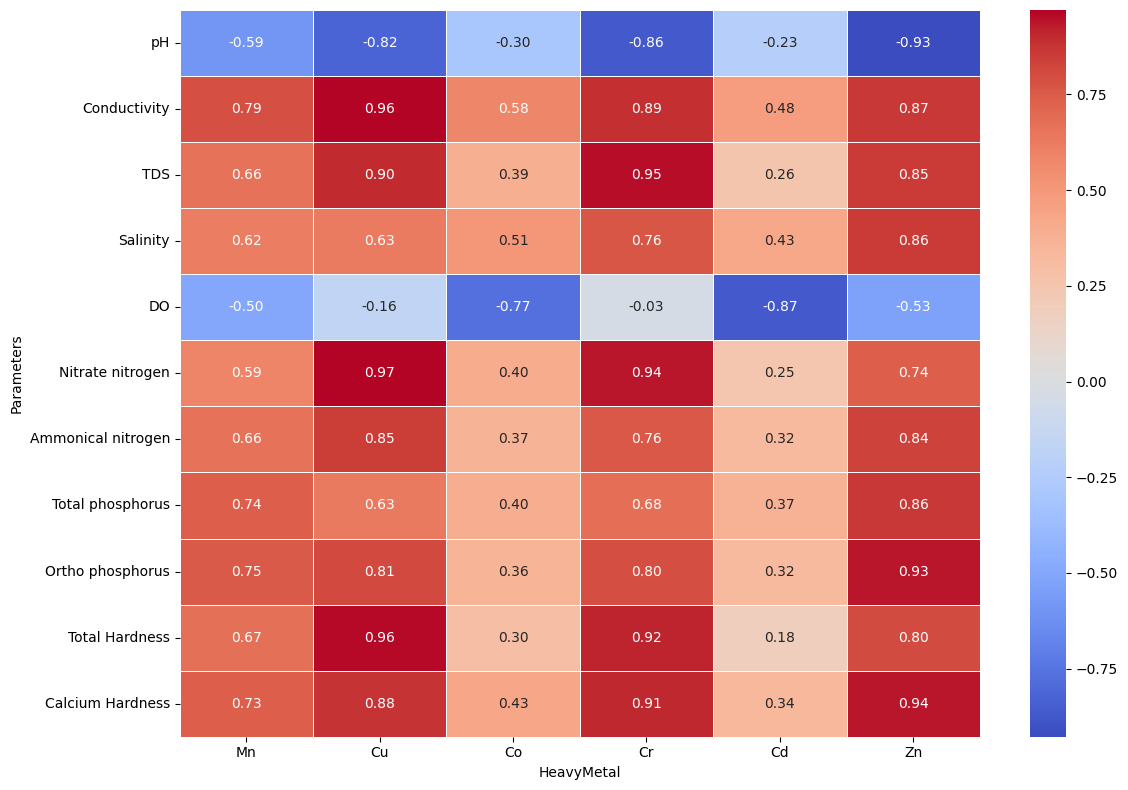

In [8]:
import pandas as pd

# Load the data
physical_df = physical.set_index('Parameters')
metals_df = metals.set_index('HeavyMetal')

# Initialize a DataFrame to store correlation results
correlation_results = pd.DataFrame(index=physical_df.index, columns=metals_df.index)

# Calculate the correlation between each parameter and each heavy metal
for param in physical_df.index:
    for metal in metals_df.index:
        # Calculate correlation across shared columns
        correlation_results.loc[param, metal] = physical_df.loc[param].corr(metals_df.loc[metal])

# Display the correlation results
print(correlation_results)

# Optional: Visualize the correlation results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_results.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title('Correlation Between Physical Parameters and Heavy Metals')
plt.tight_layout()
plt.savefig('Images/correlation_dist_metals.png', dpi=config.DPI)
